In [18]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import math
import numpy as np
from matplotlib.ticker import MaxNLocator

def simulate_tractor_full_analysis(trials=20000):
    trump_ranks = list(range(18, 0, -1))
    full_deck = [r for r in trump_ranks for _ in range(2)]
    n_results = []
    tractor_counts_per_n = {}
    max_n = -1
    max_n_details = {}

    for _ in range(trials):
        lead_size = random.randint(1, 25)
        hand = sorted(random.sample(full_deck, lead_size), reverse=True)
        original_hand = list(hand)
        temp_hand = list(hand)
        n_blocks = 0
        tractors_in_this_lead = 0

        counts = Counter(temp_hand)
        pairs = sorted([r for r, c in counts.items() if c >= 2], reverse=True)
        i = 0
        while i < len(pairs):
            length = 1
            while i + length < len(pairs) and pairs[i] - pairs[i+length] == length:
                length += 1
            if length >= 2:
                n_blocks += 1
                tractors_in_this_lead += 1
                for j in range(i, i + length):
                    temp_hand.remove(pairs[j])
                    temp_hand.remove(pairs[j])
                i += length
            else:
                i += 1

        counts = Counter(temp_hand)
        pair_ranks = [r for r, c in counts.items() if c >= 2]
        for r in pair_ranks:
            n_blocks += 1
            temp_hand.remove(r)
            temp_hand.remove(r)

        n_blocks += len(temp_hand)
        n_results.append(n_blocks)

        if n_blocks not in tractor_counts_per_n:
            tractor_counts_per_n[n_blocks] = []
        tractor_counts_per_n[n_blocks].append(tractors_in_this_lead)

        if n_blocks > max_n:
            max_n = n_blocks
            max_n_details = {'hand': original_hand, 'n': n_blocks}

    return n_results, tractor_counts_per_n, max_n_details

trials = 20000
data, tractor_stats, max_details = simulate_tractor_full_analysis(trials)
counts = Counter(data)
labels, values = zip(*sorted(counts.items()))

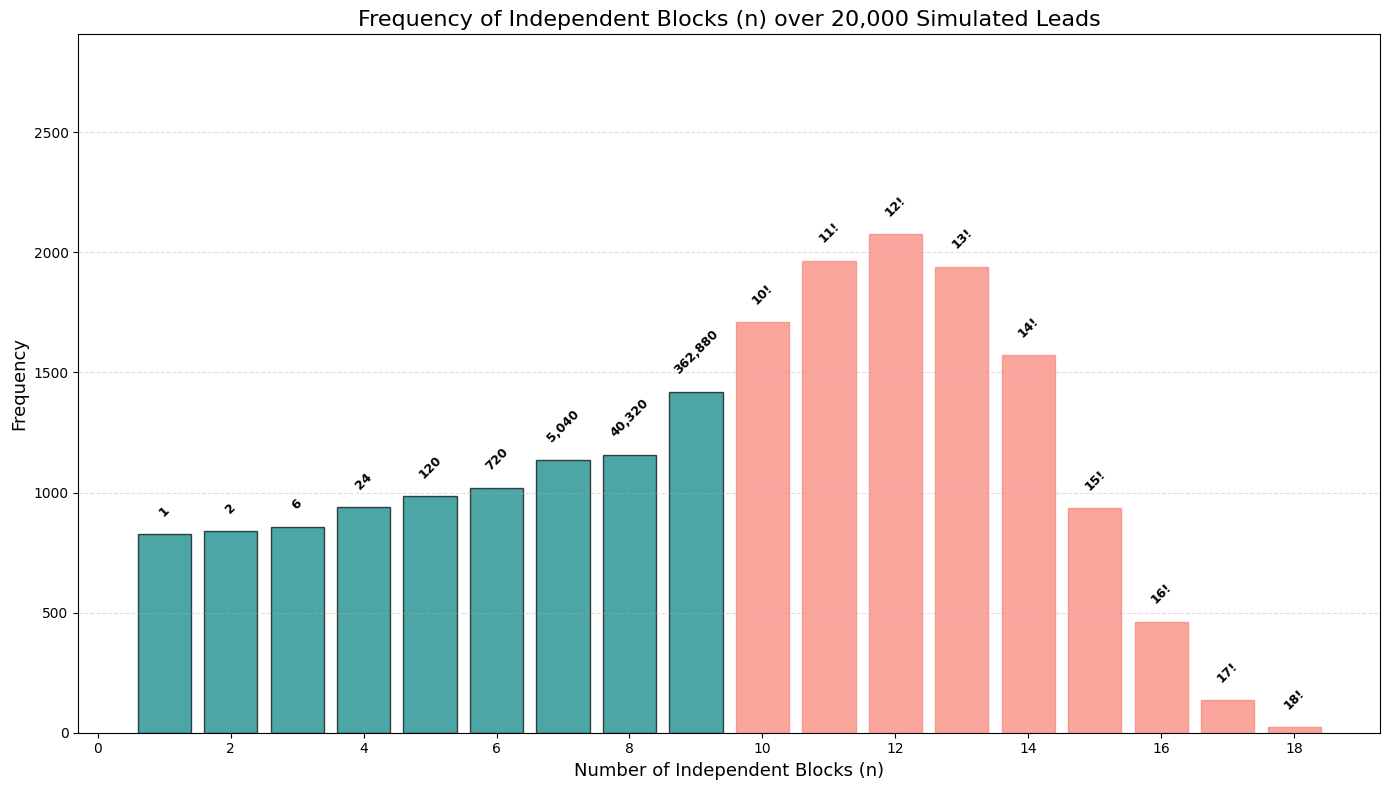

In [19]:
plt.figure(figsize=(14, 8))
plt.ylim(0, max(values) * 1.4)
bars = plt.bar(labels, values, color='teal', edgecolor='black', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
for bar, n in zip(bars, labels):
    yval = bar.get_height()
    label = f"{math.factorial(n):,}" if n < 10 else f"{n}!"
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(values)*0.03),
             label, ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45)
    if n >= 10:
        bar.set_color('salmon')
plt.title(f"Frequency of Independent Blocks (n) over {trials:,} Simulated Leads", fontsize=16)
plt.xlabel("Number of Independent Blocks (n)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

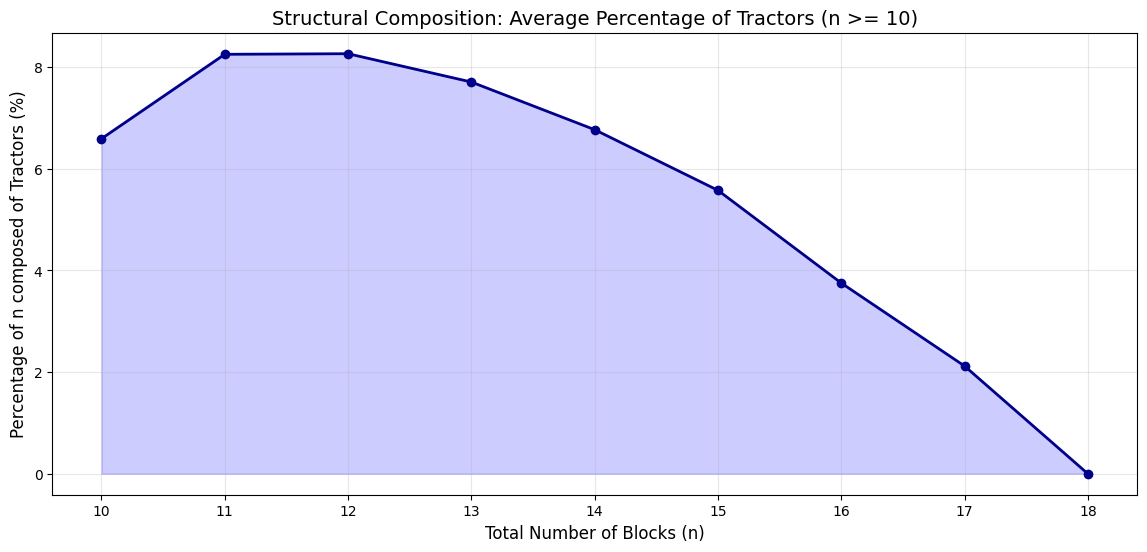

In [20]:
n_labels_sorted = sorted(tractor_stats.keys())
high_n_labels = [n for n in n_labels_sorted if n >= 10]
avg_perc_high_n = [np.mean([(t/n)*100 for t in tractor_stats[n]]) for n in high_n_labels]

plt.figure(figsize=(14, 6))
plt.plot(high_n_labels, avg_perc_high_n, marker='o', color='darkblue', linewidth=2)
plt.fill_between(high_n_labels, avg_perc_high_n, alpha=0.2, color='blue')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Structural Composition: Average Percentage of Tractors (n >= 10)", fontsize=14)
plt.xlabel("Total Number of Blocks (n)", fontsize=12)
plt.ylabel("Percentage of n composed of Tractors (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
print("\n" + "="*50)
print("             TRACTOR SIMULATION SUMMARY             ")
print("="*50)
print(f"Total Trials: {trials:,}")
print(f"Lead Size Range: 1 - 25 cards")

all_tractor_percs = []
for n in tractor_stats:
    for t in tractor_stats[n]:
        all_tractor_percs.append((t/n)*100)
print(f"Global Avg Tractors per Lead: {np.mean(all_tractor_percs):.2f}%")
print(f"Max Blocks (n) Observed: {max_details['n']}")

print("\n--- COMPLEXITY BREAKDOWN ---")
total = len(data)
n_array = np.array(data)
p_realtime = (np.sum(n_array <= 9) / total) * 100
p_latency = (np.sum((n_array >= 10) & (n_array <= 12)) / total) * 100
p_limit = (np.sum(n_array > 12) / total) * 100

print(f"Real-Time Zone (n <= 9):    {p_realtime:.2f}% of leads")
print(f"Latency Zone (n 10-12):    {p_latency:.2f}% of leads")
print(f"Computation Limit (n > 12): {p_limit:.2f}% of leads")

print("\n--- WORST CASE COMPOSITION ---")
print(f"Highest n: {max_details['n']}")
print(f"Permutations: {max_details['n']}! (approx {math.factorial(max_details['n']):.2e})")
print(f"Hand: {max_details['hand']}")

print("\n--- STRUCTURAL ANALYSIS (n >= 10) ---")
high_n_tractor_perc = []
for n in high_n_labels:
    for t in tractor_stats[n]:
        high_n_tractor_perc.append((t/n)*100)
print(f"Avg percentage of tractors when n >= 10: {np.mean(high_n_tractor_perc):.2f}%")
print("="*50)


             TRACTOR SIMULATION SUMMARY             
Total Trials: 20,000
Lead Size Range: 1 - 25 cards
Global Avg Tractors per Lead: 4.62%
Max Blocks (n) Observed: 18

--- COMPLEXITY BREAKDOWN ---
Real-Time Zone (n <= 9):    45.88% of leads
Latency Zone (n 10-12):    28.77% of leads
Computation Limit (n > 12): 25.36% of leads

--- WORST CASE COMPOSITION ---
Highest n: 18
Permutations: 18! (approx 6.40e+15)
Hand: [18, 17, 17, 16, 15, 15, 14, 13, 12, 12, 11, 10, 10, 9, 8, 7, 6, 6, 5, 4, 3, 3, 2, 1]

--- STRUCTURAL ANALYSIS (n >= 10) ---
Avg percentage of tractors when n >= 10: 7.16%
